#### I use Jake Vanderplas' github code and adjust to fulfill my needs.
https://github.com/jakevdp/matplotlib/blob/master/examples/pylab_examples/hexbin_demo.py

In [1]:
"""
hexbin is an axes method or pyplot function that is essentially
a pcolor of a 2-D histogram with hexagonal cells.  It can be
much more informative than a scatter plot; in the first subplot
below, try substituting 'scatter' for 'hexbin'.
"""

"\nhexbin is an axes method or pyplot function that is essentially\na pcolor of a 2-D histogram with hexagonal cells.  It can be\nmuch more informative than a scatter plot; in the first subplot\nbelow, try substituting 'scatter' for 'hexbin'.\n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

/Users/KimiZ/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


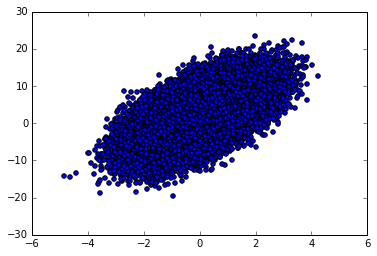

In [3]:
np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

plt.scatter(x,y)

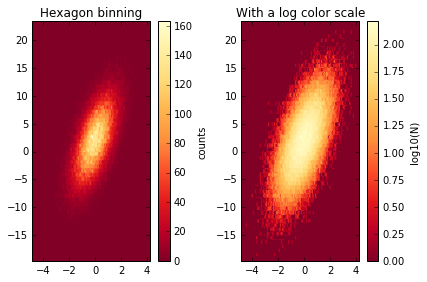

In [4]:
plt.subplots_adjust(hspace=0.5)
plt.subplot(121)
plt.hexbin(x,y, cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
cb = plt.colorbar()
cb.set_label('counts')

plt.subplot(122)
plt.hexbin(x,y,bins='log', cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.tight_layout() # to keep axes from overlapping.

## Now doing something similar with my work.
Taking the output from the BXA program that calculates a chain of parameters with the lowest cstat (highest likelihood) values, making them the most likely true parameters.

In [5]:
# directory and filename.
dir = '/Users/KimiZ/GRBs2/analysis/LAT/bn080916009/BXA/GBMwLAT/sbpl+lpow/'
file = 'sbpl+lpow-2-.txt'

In [6]:
# numpy read text file in data format. 
f = np.loadtxt(dir+file) # length of file is 6505 lines

In [7]:
# convert data into a pandas data frame.
dat = pd.DataFrame(f)

### Columns of the data are: 
    probability, maximum likelihood (cstat), alpha, beta, ebreak, band_norm, plIndex, pl_norm 
    ** normalizations are in log base-10 format.

In [8]:
dat.columns = "prob, cstat, alpha, beta, ebreak, band_norm, plIndex, pl_norm".split(", ")

In [9]:
dat[0:4] # show only the first 4 values

prob       cstat     alpha      beta       ebreak  band_norm  \
0  1.072540e-99  775.765161 -1.246102 -2.538455  1542.897616  -1.937609   
1  1.241611e-99  775.467402 -1.281920 -2.645992  1624.175117  -1.875894   
2  1.537096e-99  775.035431 -1.283705 -2.697913  2053.839493  -1.886665   
3  1.714338e-99  774.812167 -1.107678 -2.435921   690.854972  -1.903551   

    plIndex    pl_norm  
0 -4.188918 -10.839331  
1 -7.486276 -14.561131  
2 -2.137032 -14.480874  
3 -8.957004 -11.725856

### C-stat values are in the column labeled by = 1.

Sort by c-stat value, lowest first.

In [10]:
# by = column label (or number) given if not labeled.
# ascending = 1 means True, 0 means False (decending).  True and False work as well.
datS = dat.sort_values(by="cstat", axis=0, ascending=1) 

You will see now that the lowest c-stat value is 303.030296 and it is listed first.

In [11]:
datS[0:4]

prob       cstat     alpha      beta      ebreak  band_norm  \
6192  0.001138  303.030296 -1.016232 -2.179859  231.521111  -1.832774   
6181  0.000919  303.458305 -1.016980 -2.189442  237.075629  -1.836664   
6232  0.000888  303.526040 -1.008700 -2.185617  242.994091  -1.845970   
6202  0.000865  303.579730 -0.985978 -2.183186  223.760875  -1.834512   

       plIndex   pl_norm  
6192 -2.684824 -3.890637  
6181 -2.433596 -3.687145  
6232 -2.223800 -3.434704  
6202 -2.447108 -3.563520

Now, we only want the first 3000 rows of data with the lowest c-stat values.

In [12]:
data = datS[:3000] # this is called slicing.  

(-1.15, -0.97)

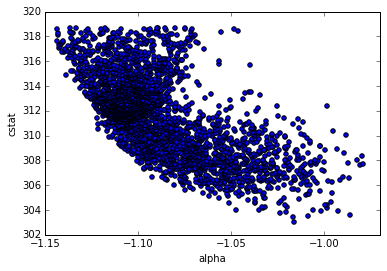

In [13]:
plt.scatter(data.alpha, data.cstat)
plt.xlabel("alpha")
plt.ylabel("cstat")
plt.xlim(-1.15,-0.97)

In [14]:
x,y = data.alpha, data.cstat

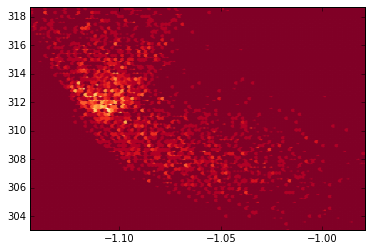

In [15]:
plt.hexbin(x,y, cmap=plt.cm.YlOrRd_r)

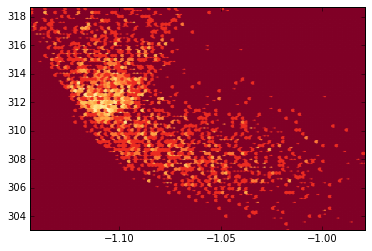

In [16]:
plt.hexbin(x,y, bins='log', cmap=plt.cm.YlOrRd_r)

### Other color map's to explore:
http://matplotlib.org/examples/color/colormaps_reference.html

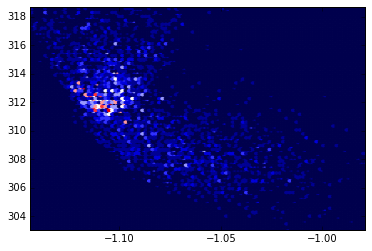

In [17]:
plt.hexbin(x,y, cmap=plt.cm.seismic)

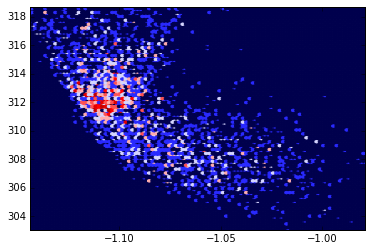

In [18]:
plt.hexbin(x,y,bins='log', cmap=plt.cm.seismic)

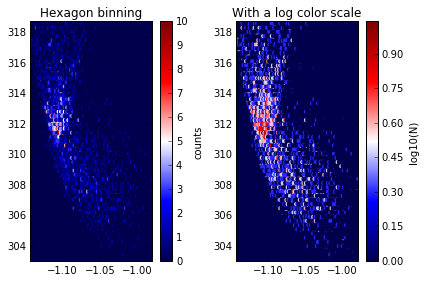

In [19]:
plt.subplots_adjust(hspace=0.7)
plt.subplot(121)
plt.hexbin(x,y, cmap=plt.cm.seismic)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
cb = plt.colorbar()
cb.set_label('counts')

plt.subplot(122)
plt.hexbin(x,y,bins='log', cmap=plt.cm.seismic)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.tight_layout()

plt.show()

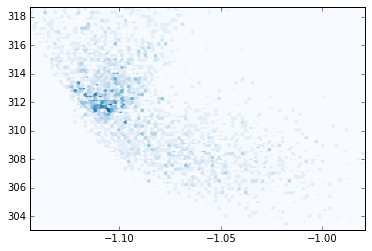

In [20]:
plt.hexbin(x,y, cmap=plt.cm.Blues)

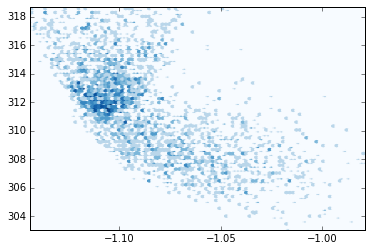

In [21]:
plt.hexbin(x,y,bins='log', cmap=plt.cm.Blues)

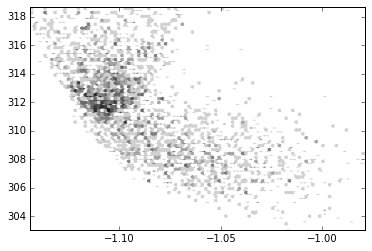

In [22]:
plt.hexbin(x,y,bins='log', cmap=plt.cm.Greys)

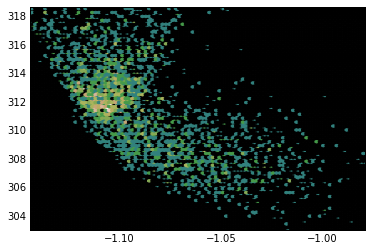

In [23]:
plt.hexbin(x,y,bins='log', cmap=plt.cm.gist_earth)

In [24]:
x,y = data.alpha, data.beta

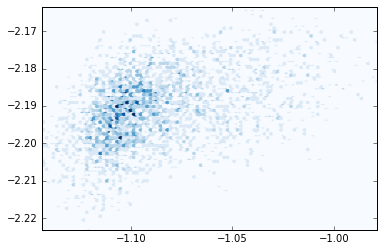

In [25]:
plt.hexbin(x,y, cmap=plt.cm.Blues)

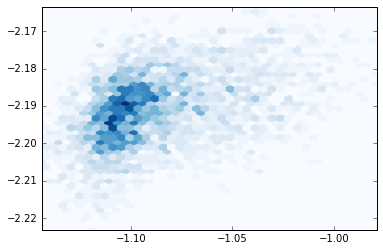

In [26]:
plt.hexbin(x,y, gridsize=40, cmap=plt.cm.Blues)

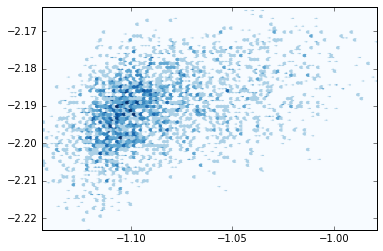

In [27]:
plt.hexbin(x,y, bins='log', cmap=plt.cm.Blues)

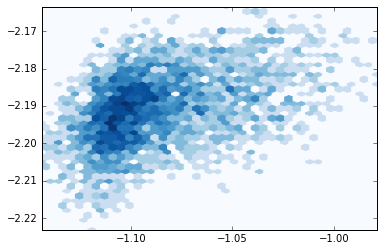

In [28]:
plt.hexbin(x,y, bins='log', gridsize=40, cmap=plt.cm.Blues)

## Examples of subplots by Jake Vanderplas to use for guidance.

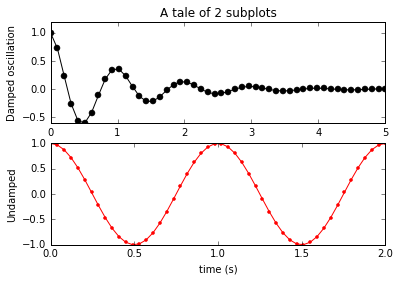

In [29]:
"""
Simple demo with multiple subplots.
https://github.com/jakevdp/matplotlib/blob/master/examples/pylab_examples/subplot_demo.py
"""
#import numpy as np
#import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'ko-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

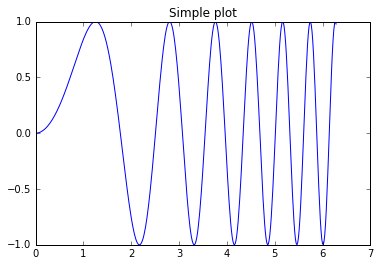

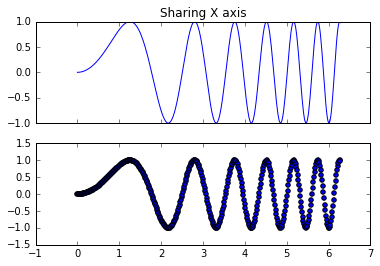

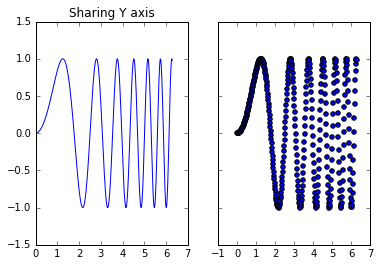

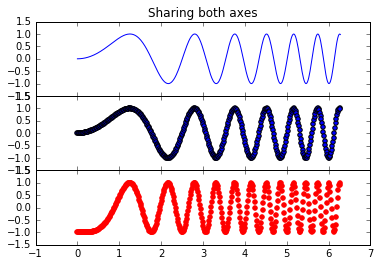

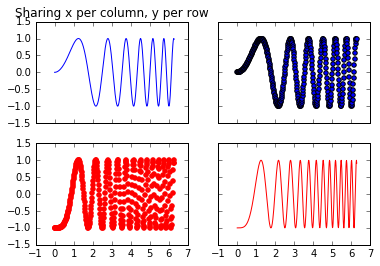

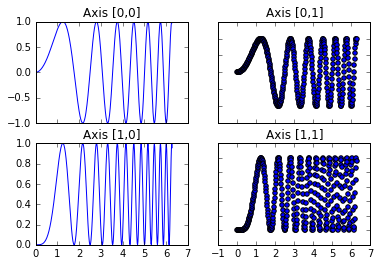

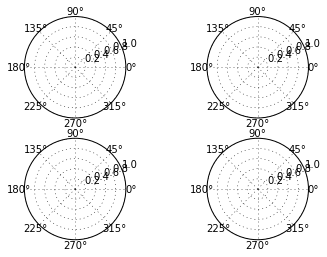

In [30]:
"""Examples illustrating the use of plt.subplots().
This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.

https://github.com/jakevdp/matplotlib/blob/master/examples/pylab_examples/subplots_demo.py
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
plt.subplots(2, 2, subplot_kw=dict(polar=True))

plt.show()

## Using these examples for my own work.

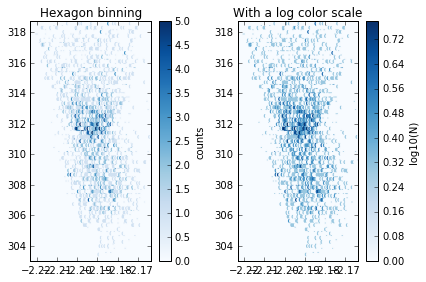

In [31]:
x,y = data.beta, data.cstat

plt.subplots_adjust(hspace=0.7)
plt.subplot(121)
plt.hexbin(x,y, cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
cb = plt.colorbar()
cb.set_label('counts')

plt.subplot(122)
plt.hexbin(x,y,bins='log', cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.tight_layout()

plt.show()

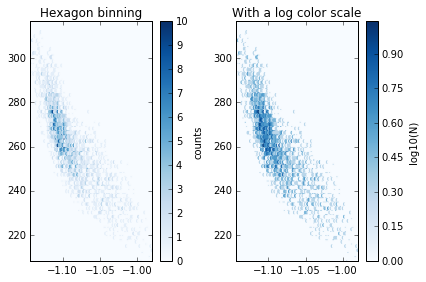

In [32]:
x,y = data.alpha, data.ebreak

plt.subplots_adjust(hspace=0.7)
plt.subplot(121)
plt.hexbin(x,y, cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
cb = plt.colorbar()
cb.set_label('counts')

plt.subplot(122)
plt.hexbin(x,y,bins='log', cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('log10(N)')
plt.tight_layout()
plt.show()

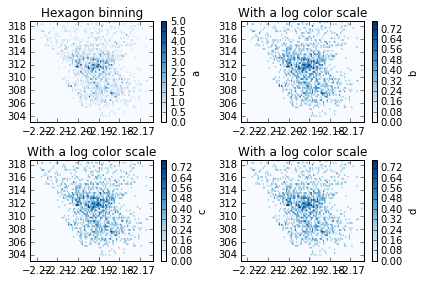

In [33]:
x,y = data.beta, data.cstat
# plt.subplot(dim1, dim2, plotnumber) 
plt.subplot(2, 2, 1)
plt.hexbin(x,y, cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning")
cb = plt.colorbar()
cb.set_label('a')

plt.subplot(2, 2, 2)
plt.hexbin(x,y,bins='log', cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('b')

plt.subplot(2, 2, 3)
plt.hexbin(x,y,bins='log', cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('c')

plt.subplot(2, 2, 4)
plt.hexbin(x,y,bins='log', cmap=plt.cm.Blues)
#plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
cb.set_label('d')

plt.tight_layout()

plt.show()

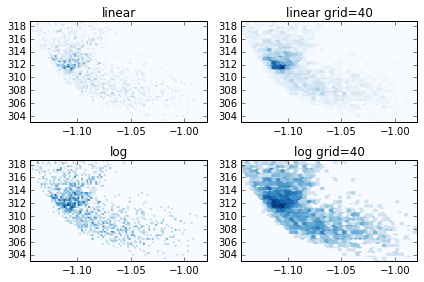

In [34]:
x,y = data.alpha, data.cstat

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].hexbin(x,y, cmap=plt.cm.Blues)
axarr[0, 0].set_title('linear')
axarr[0, 1].hexbin(x,y, gridsize=40, cmap=plt.cm.Blues)
axarr[0, 1].set_title('linear grid=40')
axarr[1, 0].hexbin(x,y, bins='log', cmap=plt.cm.Blues)
axarr[1, 0].set_title('log')
axarr[1, 1].hexbin(x,y, gridsize=40, bins='log', cmap=plt.cm.Blues)
axarr[1, 1].set_title('log grid=40')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
#plt.subplots(2, 2, subplot_kw=dict(polar=True))
plt.tight_layout()

plt.show()

## Now each parameter with the others.

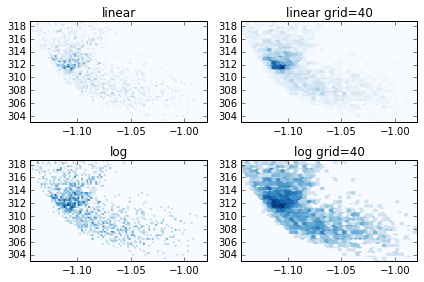

In [35]:
x,y = data.alpha, data.cstat

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].hexbin(x,y, cmap=plt.cm.Blues)
axarr[0, 0].set_title('linear')
axarr[0, 1].hexbin(x,y, gridsize=40, cmap=plt.cm.Blues)
axarr[0, 1].set_title('linear grid=40')
axarr[1, 0].hexbin(x,y, bins='log', cmap=plt.cm.Blues)
axarr[1, 0].set_title('log')
axarr[1, 1].hexbin(x,y, gridsize=40, bins='log', cmap=plt.cm.Blues)
axarr[1, 1].set_title('log grid=40')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
#plt.subplots(2, 2, subplot_kw=dict(polar=True))
plt.tight_layout()

plt.show()

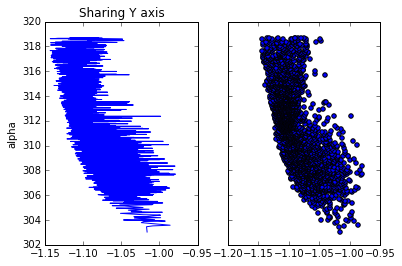

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax1.set_ylabel('alpha')
ax2.scatter(x, y)

## Parameter Plots
    alpha vs. beta, ebreak, norm_grbm, plIndex, norm_pl
    bet vs. ebreak, norm_grbm, plIndex, norm_pl
    ebreak vs. norm_grbm, plIndex, norm_pl
    norm_grbm vs. plIndex, norm_pl
    plIndex vs. norm_pl
    
### 15 total plots

In [37]:
pars = data.columns[2:] # or ['alpha','beta','ebreak','band_norm', 'plIndex', 'pl_norm']
npars = len(pars)
x,y = data.alpha, data.beta

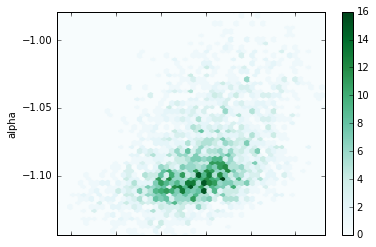

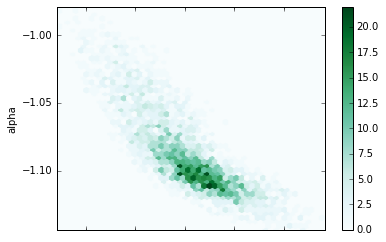

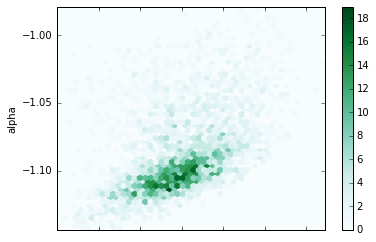

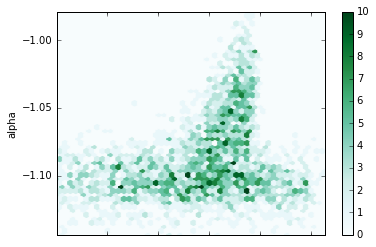

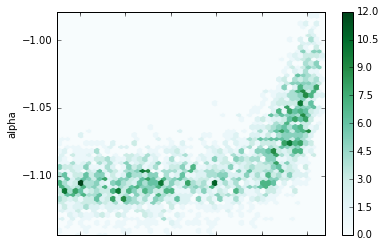

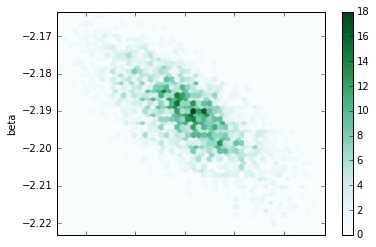

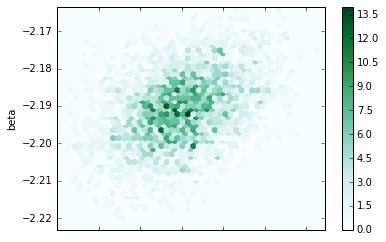

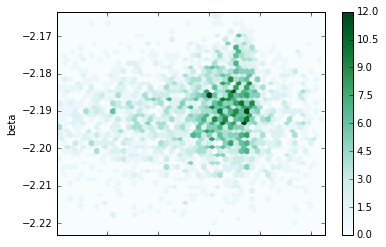

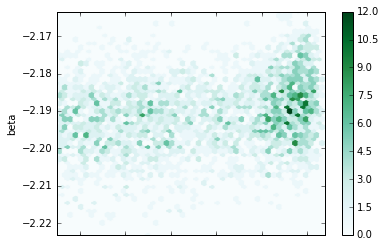

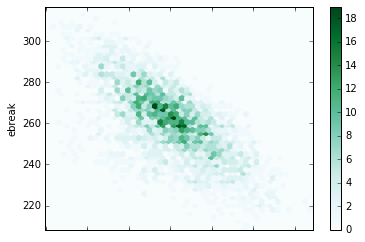

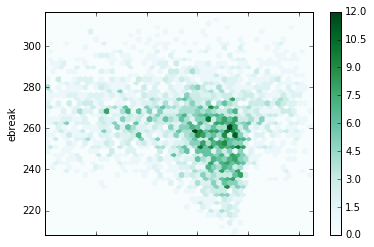

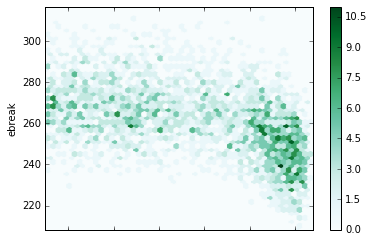

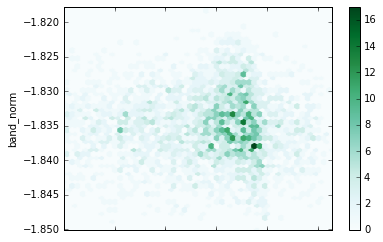

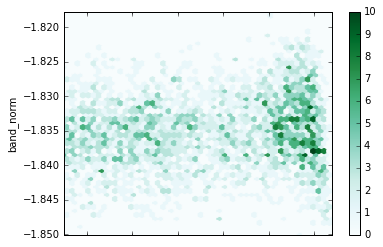

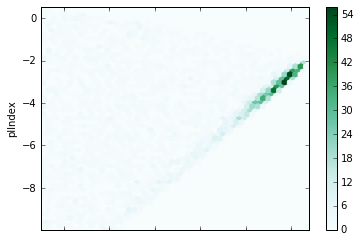

In [38]:
for i in range(0, npars):
    j = i+1
    while j<= npars-1:
        data.plot.hexbin(x = pars[j], y = pars[i], gridsize=50)
        plt.xlabel(pars[j])
        plt.ylabel(pars[i])
        #plt.savefig('%s_vs_%s.png'%(new_names[i], new_names[j]), dpi=250)
        j = j+1


In [39]:
def plot_conditional(dim1, dim2, grid_points = 40, **kwargs):
    xvalue = data[data.columns[dim1]]
    yvalue = data[data.columns[dim2]]
    return plt.hexbin(x = xvalue, y = yvalue, gridsize=grid_points, 
                      reduce_C_function=np.nansum,**kwargs)

In [40]:
for i in range(npars):
    for j in range(i):
        #plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        print i, j

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
5 4


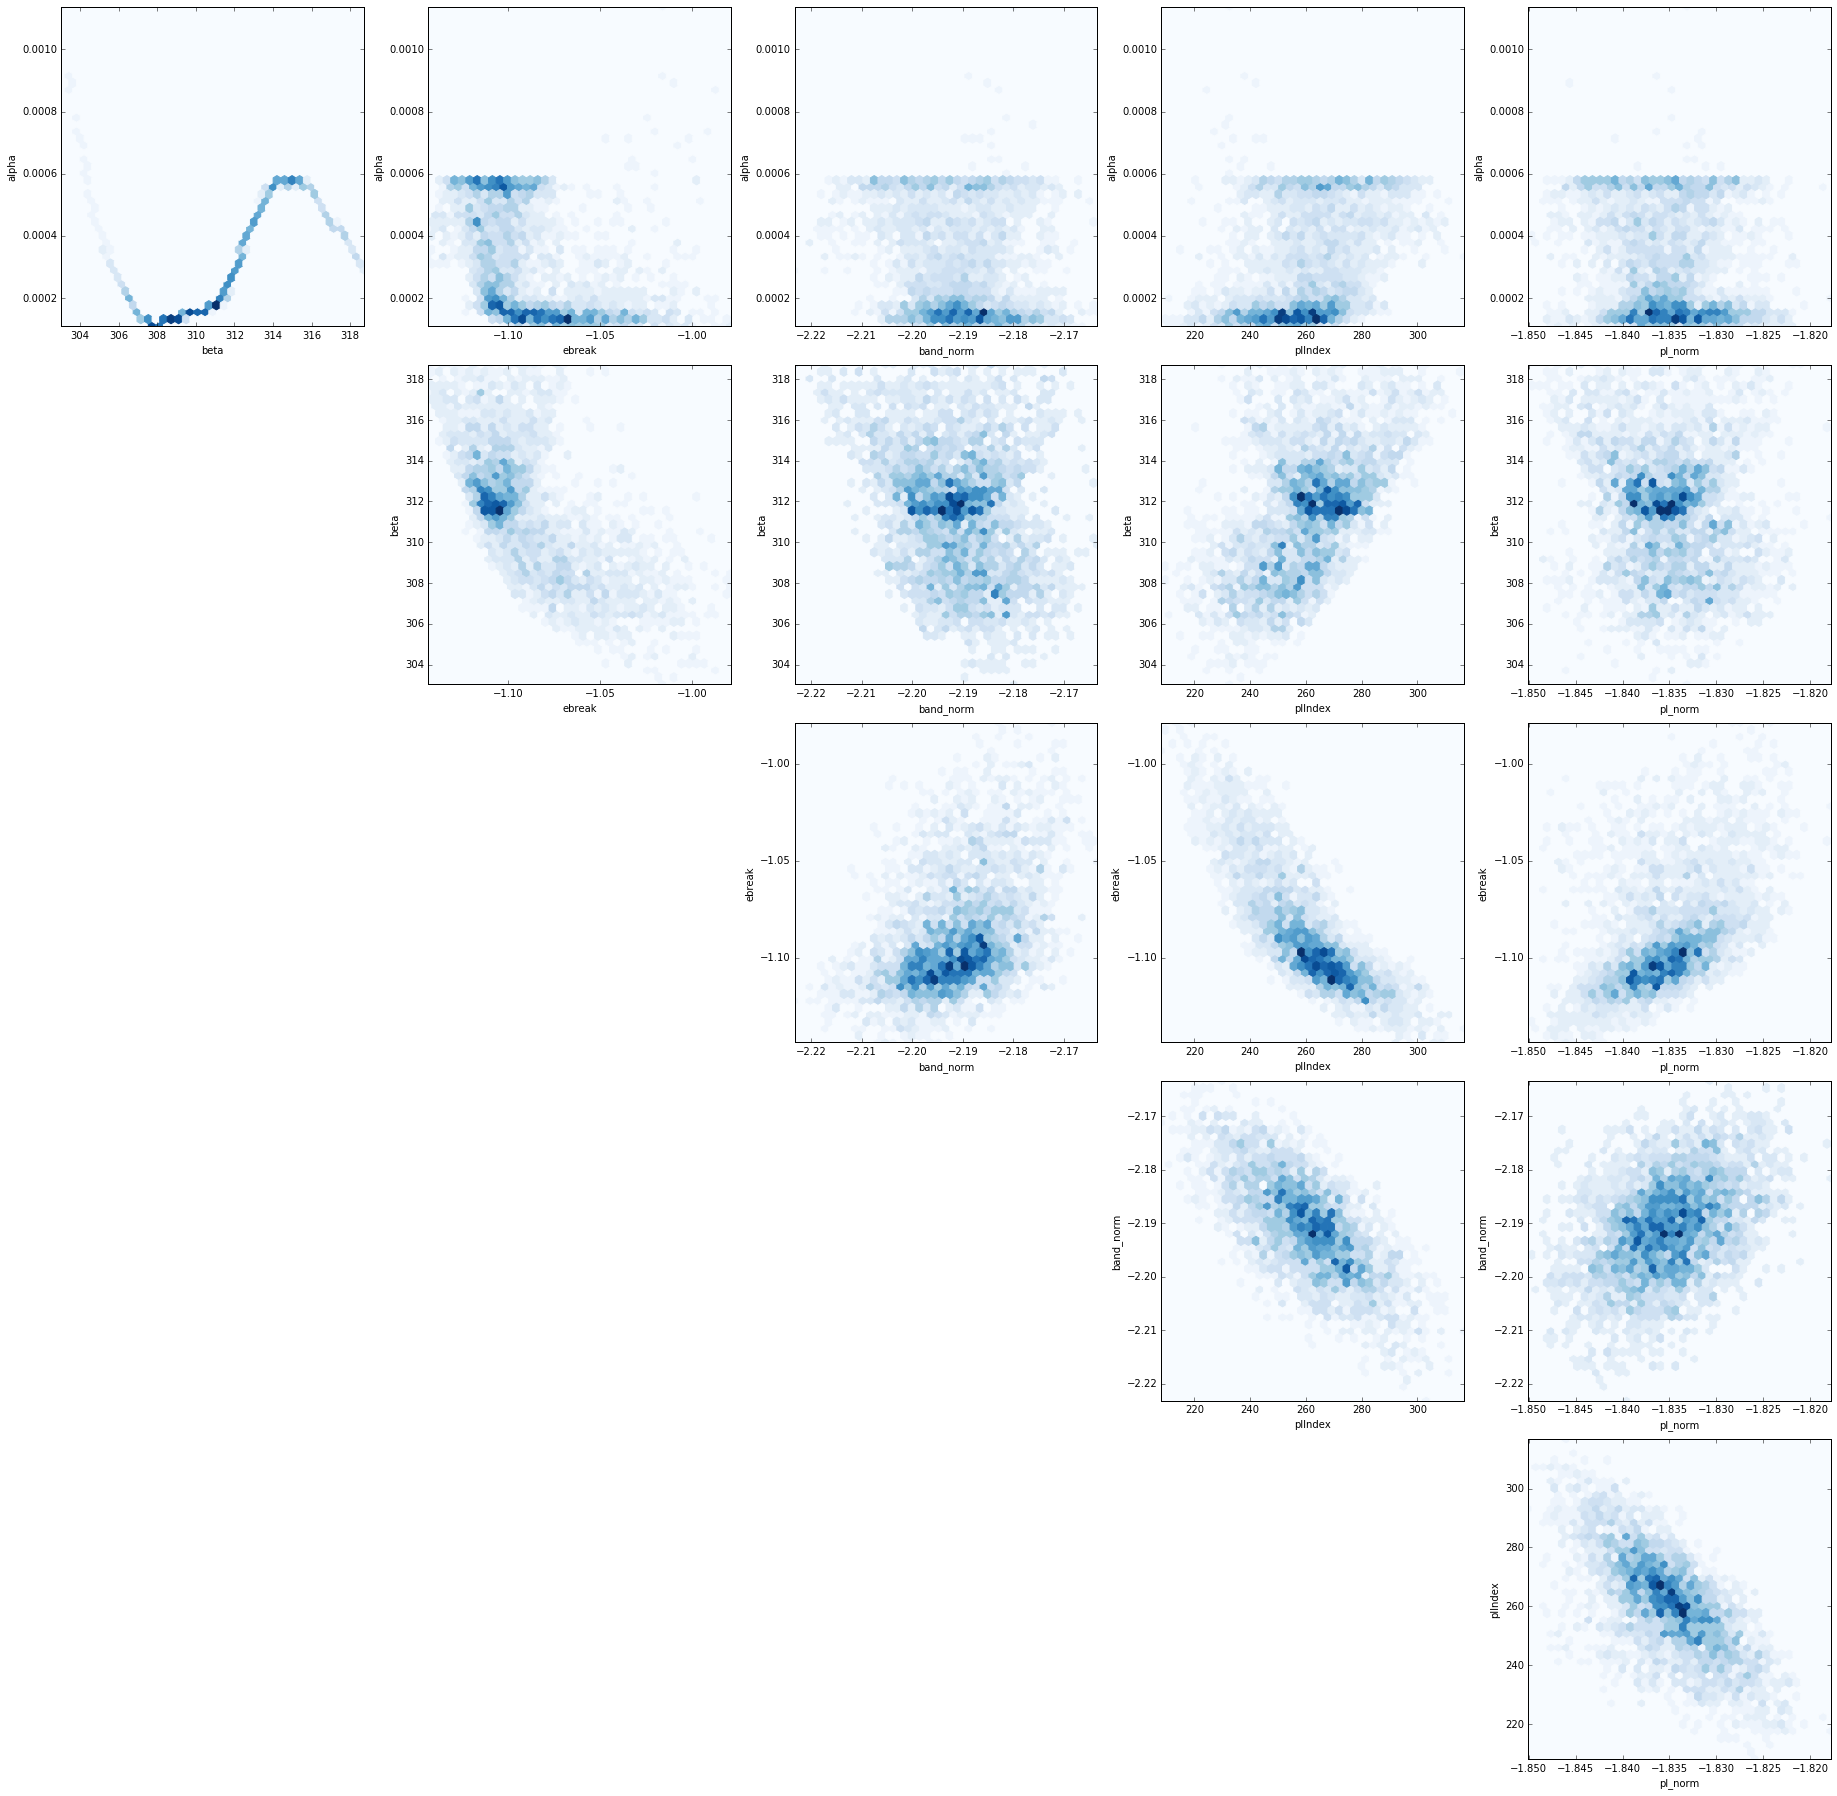

In [41]:
plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):
    for j in range(i):
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(i, j, bins=20, cmap = plt.cm.Blues)
        plt.xlabel(pars[i])
        plt.ylabel(pars[j])
        #plt.errorbar(x=, y=, xerr=, yerr=)
plt.tight_layout()

Under cmap, you'll notice the _r tacked onto the end of the next plot. That stands for reverse of the colors.

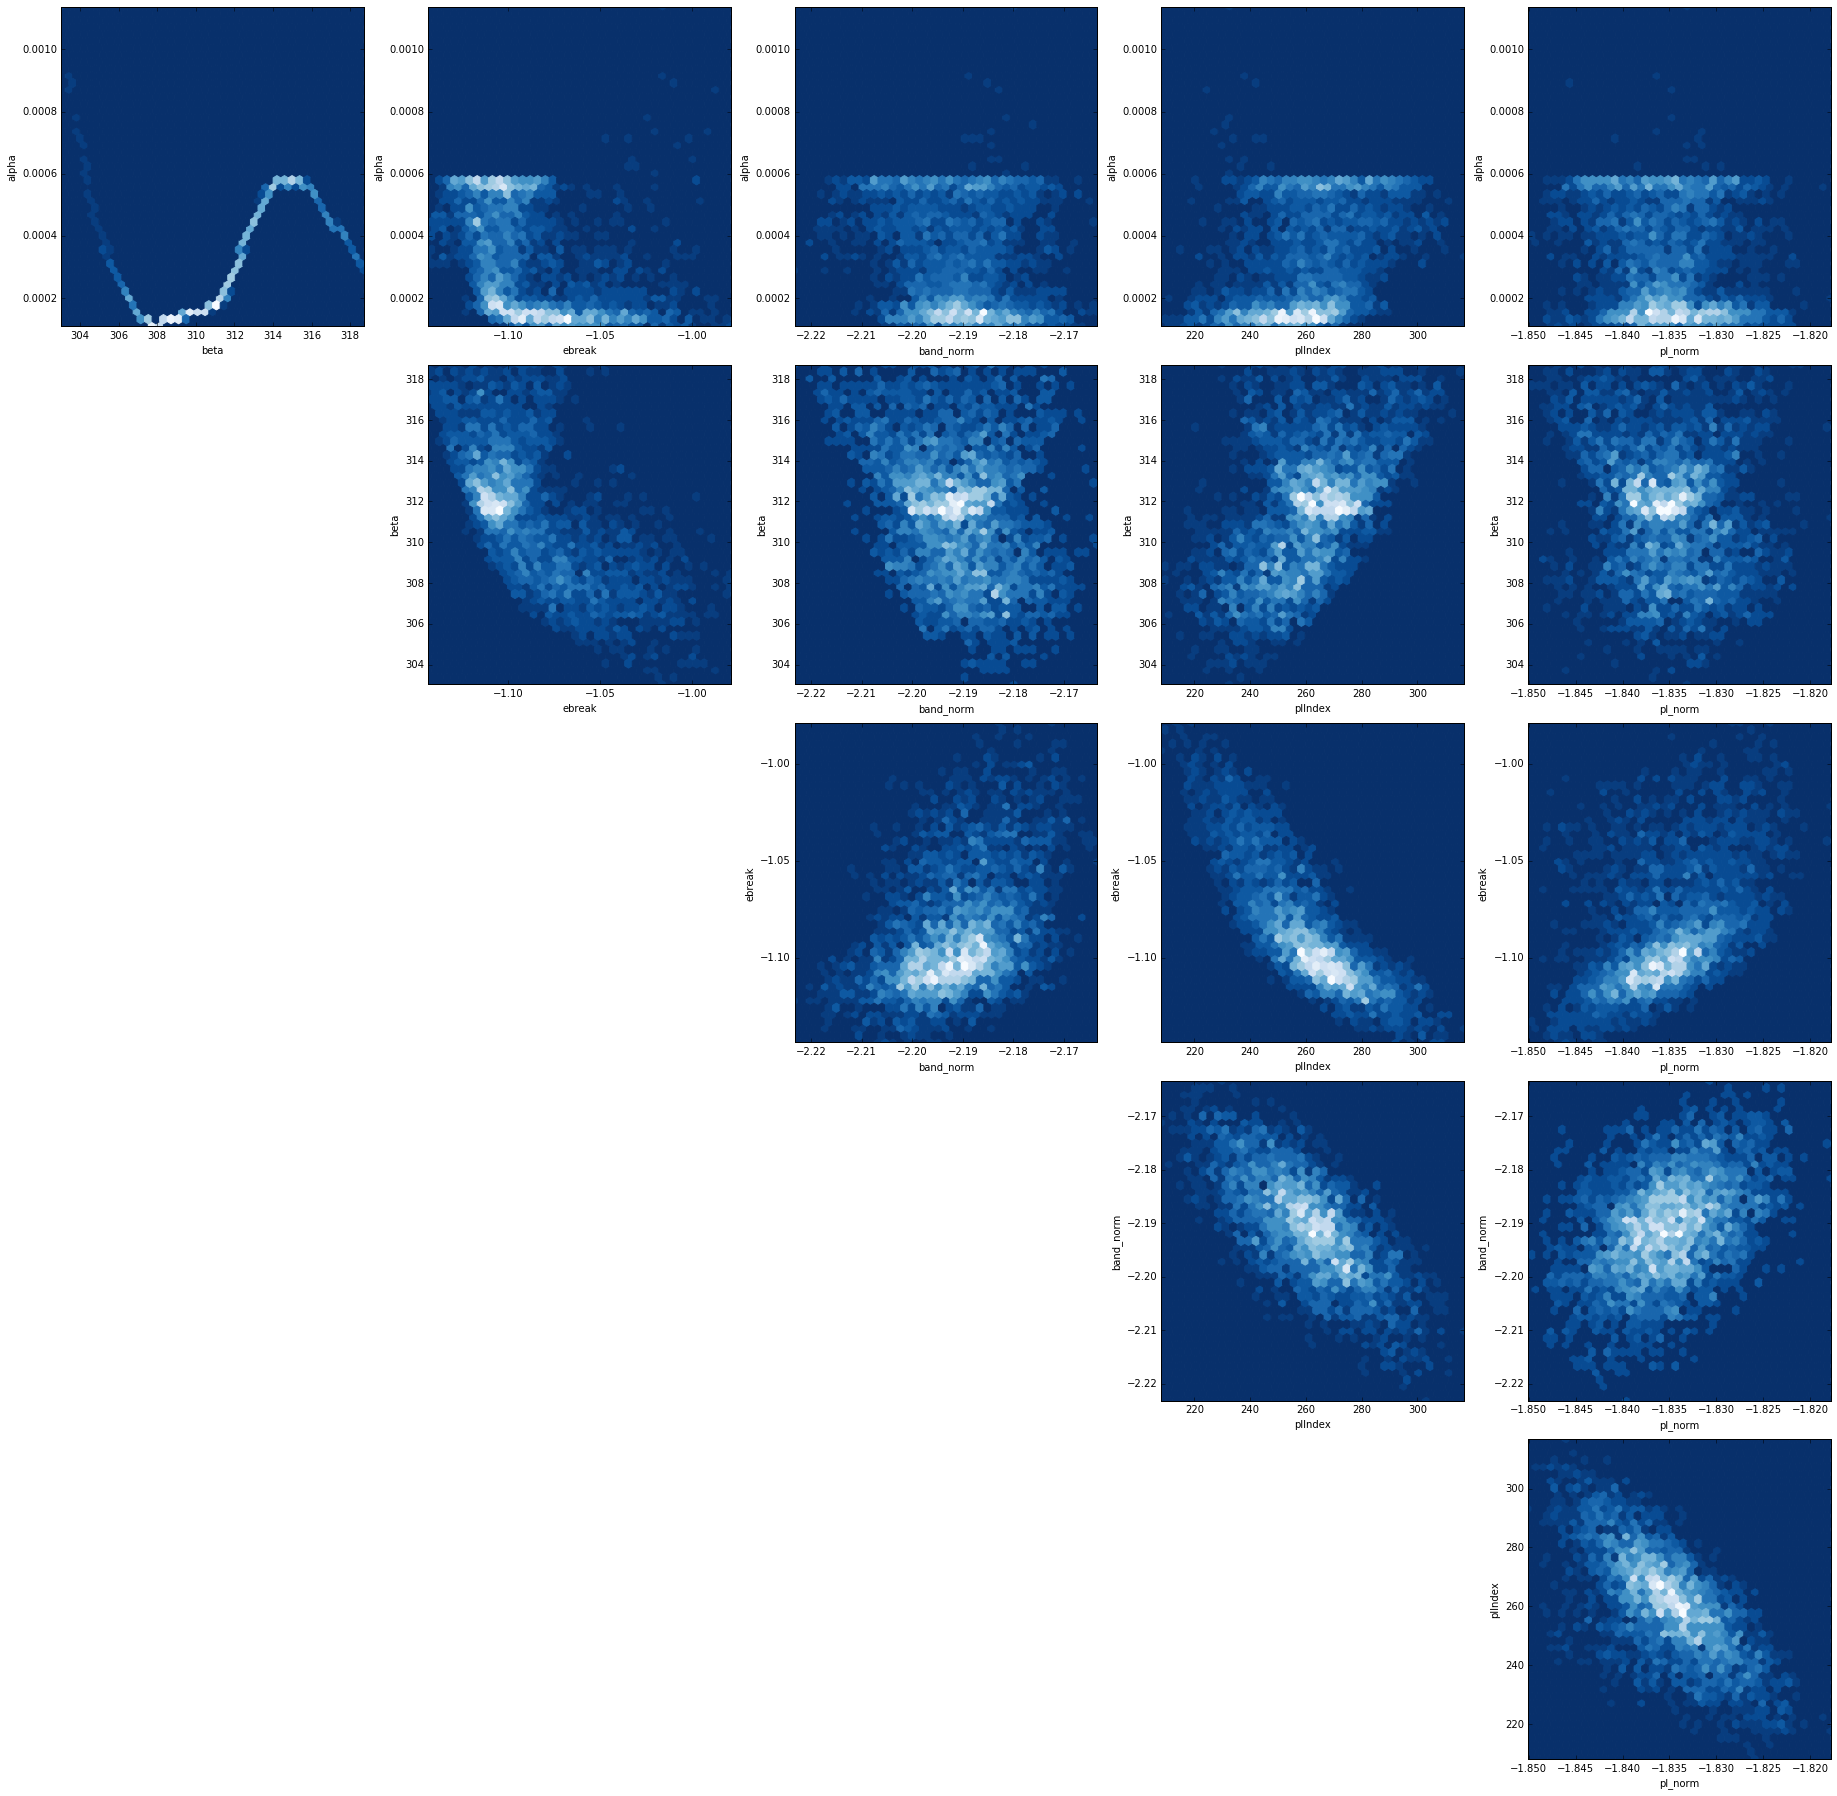

In [42]:
plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):
    for j in range(i):
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(i, j, bins=20, cmap = plt.cm.Blues_r)
        plt.xlabel(pars[i])
        plt.ylabel(pars[j])
        #plt.errorbar(x=, y=, xerr=, yerr=)
plt.tight_layout()

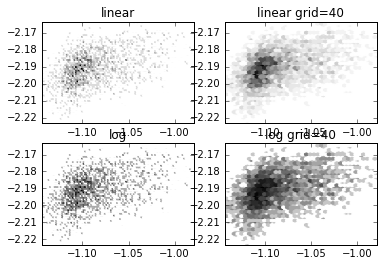

In [43]:
gridsize = 40
f, axarr = plt.subplots(2, 2)
axarr[0, 0].hexbin(x,y, cmap=plt.cm.gray_r)
axarr[0, 0].set_title('linear')
axarr[0, 1].hexbin(x,y, gridsize=gridsize, cmap=plt.cm.gray_r)
axarr[0, 1].set_title('linear grid=%i'%gridsize)
axarr[1, 0].hexbin(x,y, bins='log', cmap=plt.cm.gray_r)
axarr[1, 0].set_title('log')
axarr[1, 1].hexbin(x,y, gridsize=gridsize, bins='log', cmap=plt.cm.gray_r)
axarr[1, 1].set_title('log grid=%i'%gridsize)

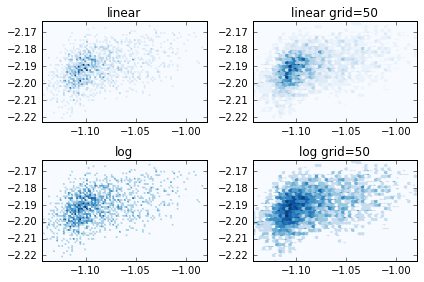

In [44]:
x,y = data.alpha, data.beta
gridsize = 50

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].hexbin(x,y, cmap=plt.cm.Blues)
axarr[0, 0].set_title('linear')
axarr[0, 1].hexbin(x,y, gridsize=gridsize, cmap=plt.cm.Blues)
axarr[0, 1].set_title('linear grid=%i'%gridsize)
axarr[1, 0].hexbin(x,y, bins='log', cmap=plt.cm.Blues)
axarr[1, 0].set_title('log')
axarr[1, 1].hexbin(x,y, gridsize=gridsize, bins='log', cmap=plt.cm.Blues)
axarr[1, 1].set_title('log grid=%i'%gridsize)
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
#plt.subplots(2, 2, subplot_kw=dict(polar=True))
plt.tight_layout()

plt.show()

## Example 2 for Hexbin.
Not sure how I can use this one yet.
https://github.com/jakevdp/matplotlib/blob/master/examples/pylab_examples/hexbin_demo2.py


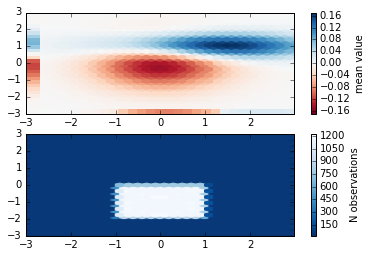

In [45]:
"""
hexbin is an axes method or pyplot function that is essentially a
pcolor of a 2-D histogram with hexagonal cells.
"""

import numpy as np
import  matplotlib.pyplot as plt
import matplotlib.mlab as mlab

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = Z2-Z1  # difference of Gaussians

x = X.ravel()
y = Y.ravel()
z = Z.ravel()

if 1:
    # make some points 20 times more common than others, but same mean
    xcond = (-1 < x) & (x < 1)
    ycond = (-2 < y) & (y < 0)
    cond = xcond & ycond
    xnew = x[cond]
    ynew = y[cond]
    znew = z[cond]
    for i in range(20):
        x = np.hstack((x,xnew))
        y = np.hstack((y,ynew))
        z = np.hstack((z,znew))

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

gridsize=30

plt.subplot(211)
plt.hexbin(x,y, C=z, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu, 
           vmax=abs(z).max(), vmin=-abs(z).max())
plt.axis([xmin, xmax, ymin, ymax])
cb = plt.colorbar()
cb.set_label('mean value')


plt.subplot(212)
plt.hexbin(x,y, gridsize=gridsize, cmap=plt.cm.Blues_r)
plt.axis([xmin, xmax, ymin, ymax])
cb = plt.colorbar()
cb.set_label('N observations')

plt.show()

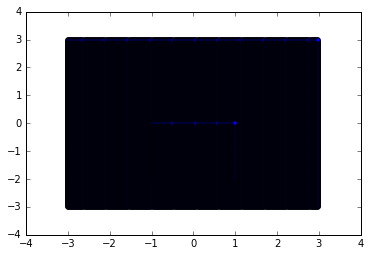

In [46]:
plt.scatter(x,y)

Just to get an idea of what I'm looking at, I'm only plotting the first 4000 rows of data.

In [47]:
x1 = x[0:4000]
y1 = y[0:4000]

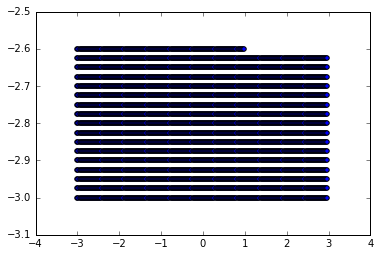

In [48]:
plt.scatter(x1,y1)